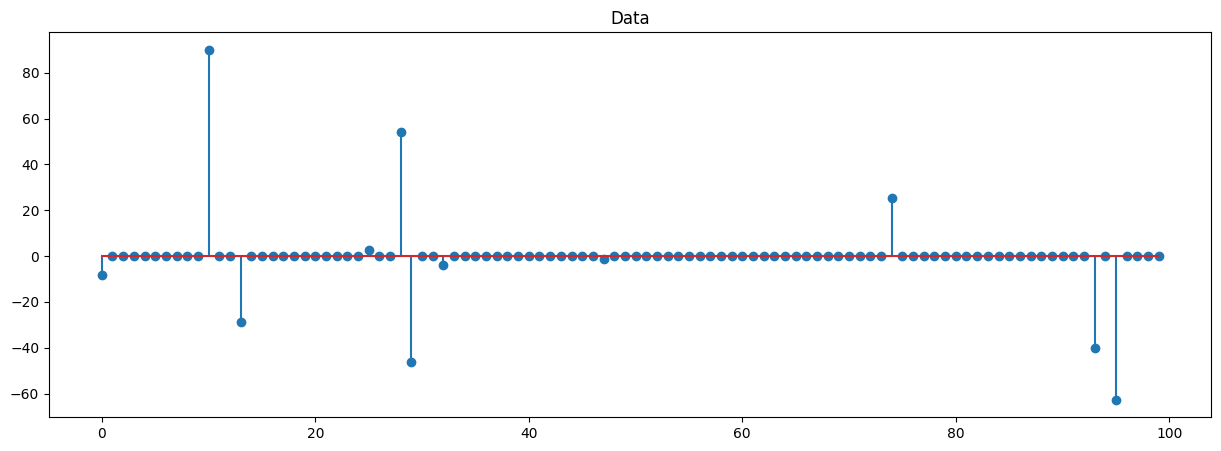

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Data generation
signal_length = 100  # Total length of the signal
num_nonzero = 10
your_index_no = 200398  # Enter your index number (without English letter and without leading zeros)
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10) * 10 + 10
if your_index_no % 10 == 0:
    signal[10] = np.random.randn(1) + 30
signal = signal.reshape(signal_length, 1)

# plotting
plt.figure(figsize=(15, 5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)
plt.show()


In [10]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
normalized_data_max_abs = max_abs_scaler.fit_transform(signal)

def standard_scale(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    scaled_data = (data - mean) / std_dev
    return scaled_data

normalized_data_standard = standard_scale(signal)



In [11]:
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

normalized_data_min_max = min_max_scale(signal)


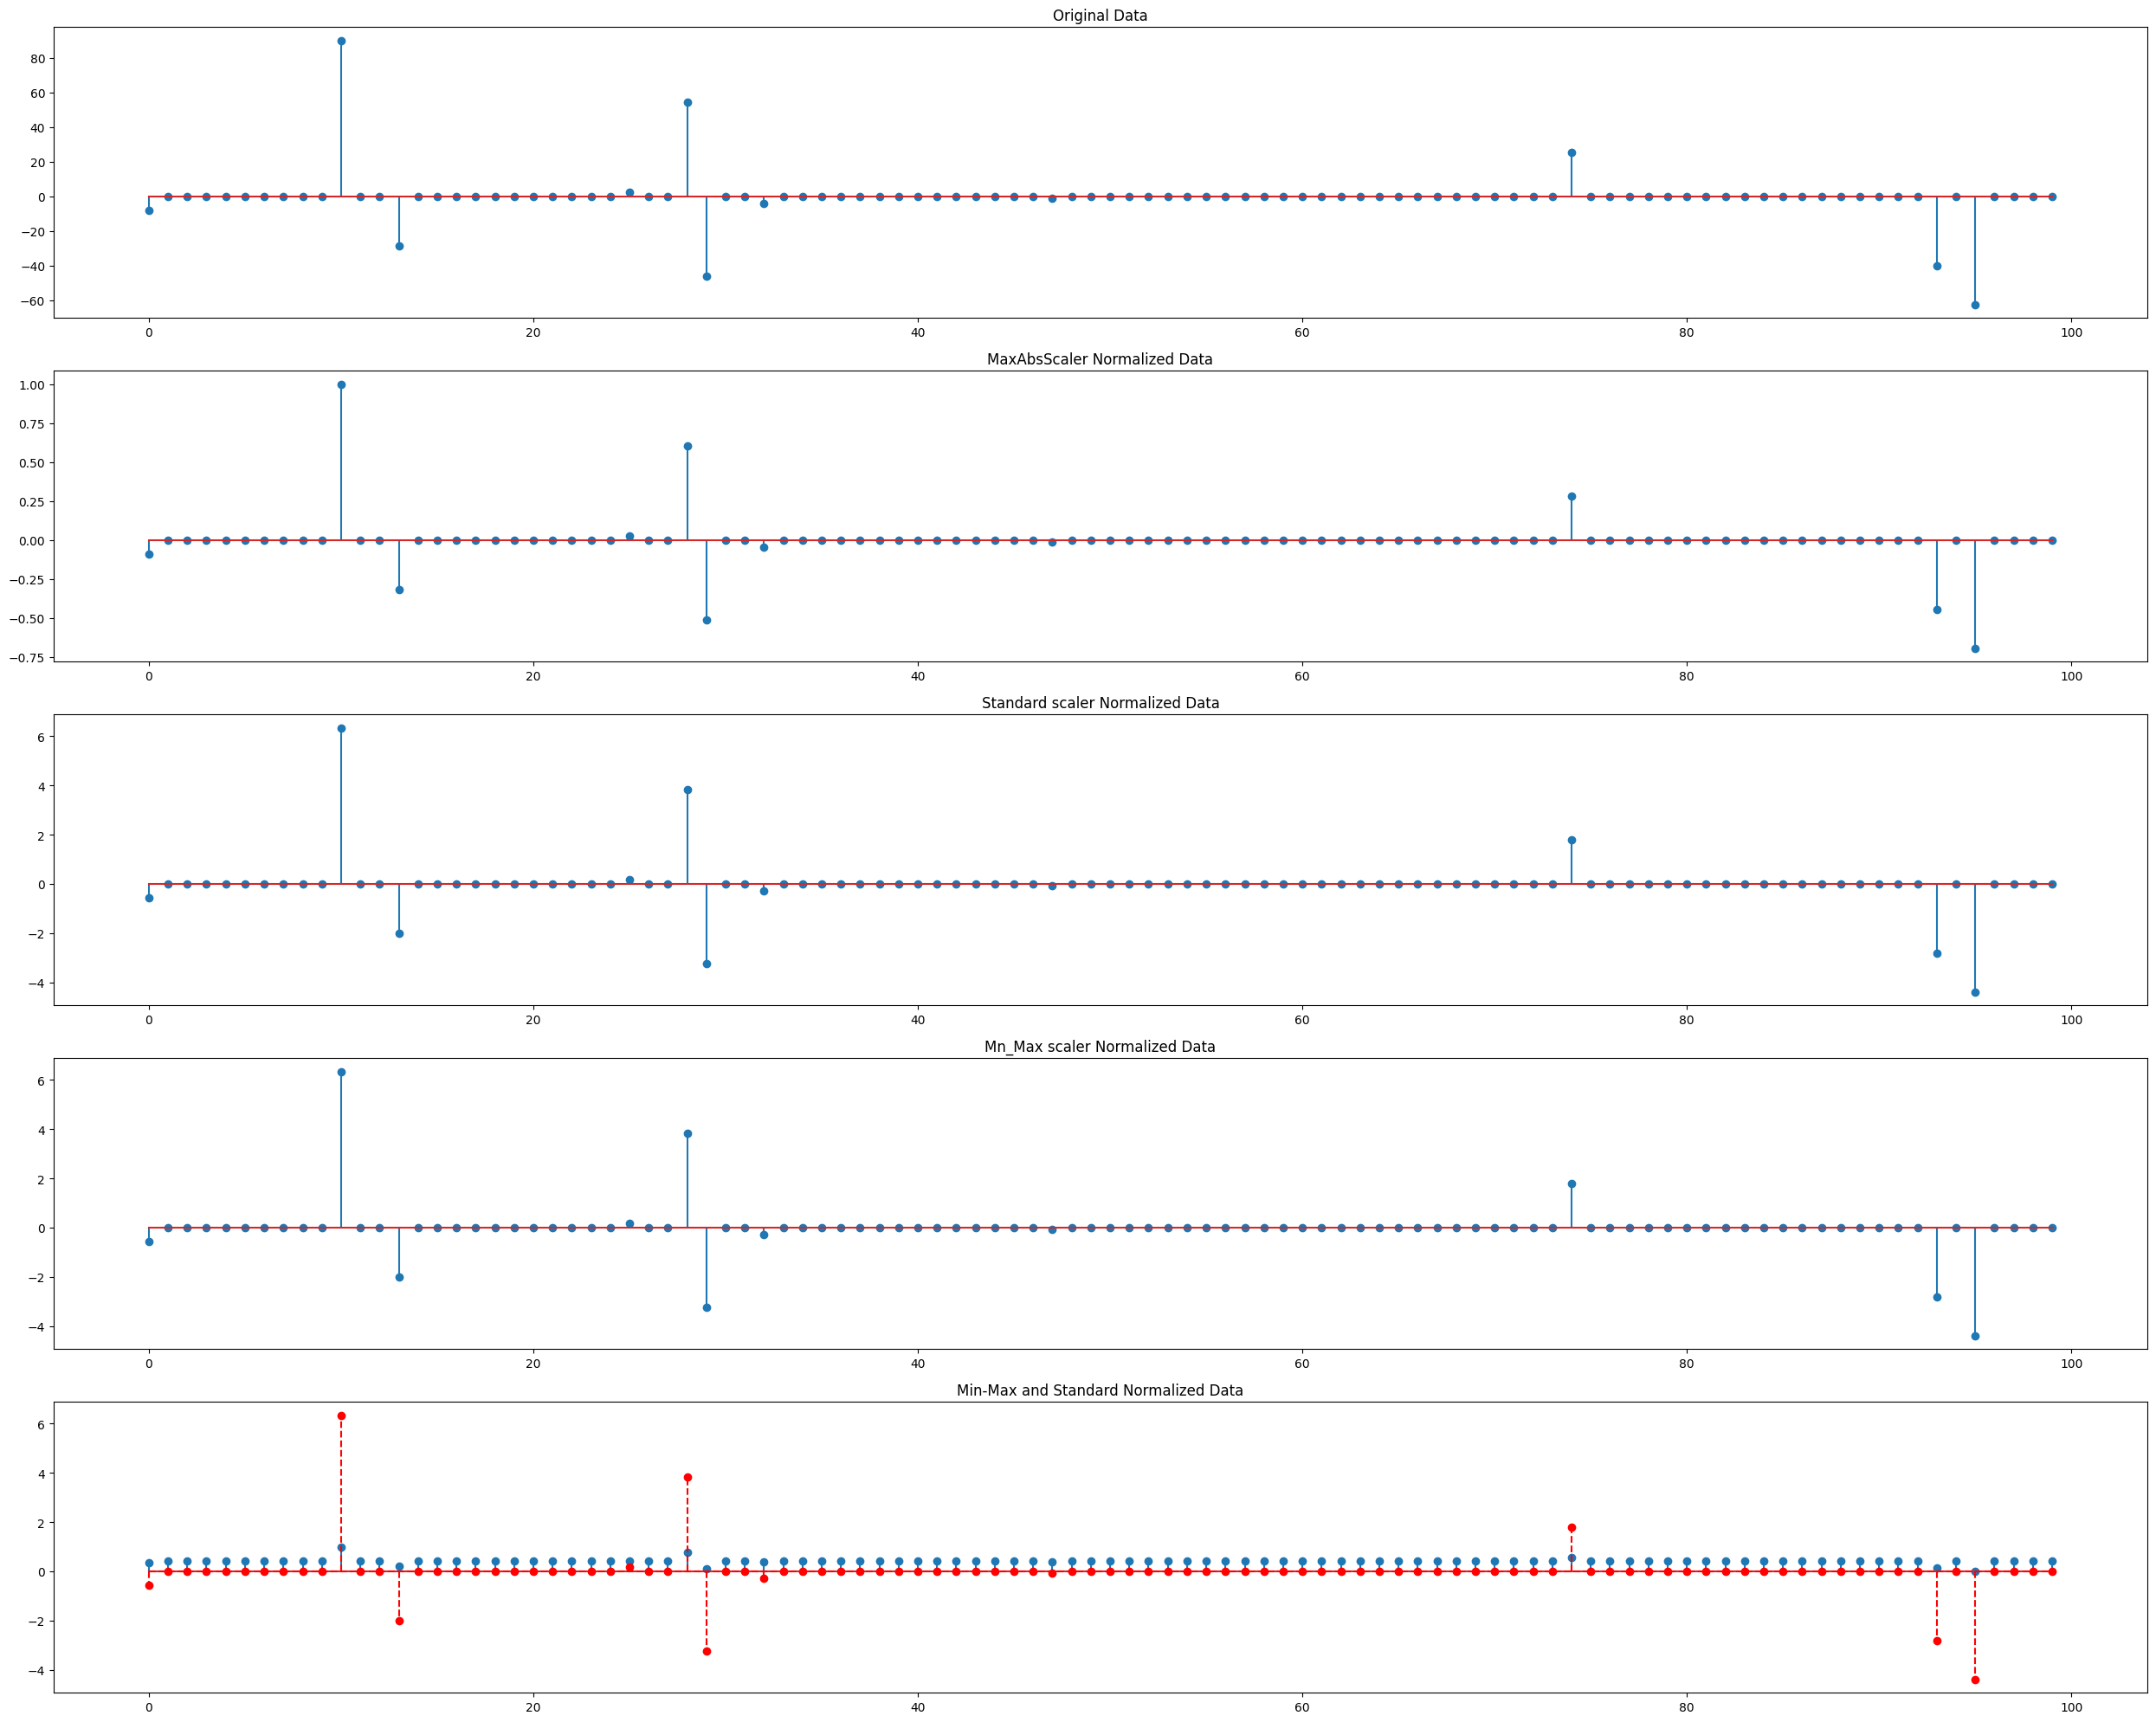

In [23]:
plt.figure(figsize=(25, 20))

# Original data
plt.subplot(5, 1, 1)
plt.title("Original Data")
plt.stem(signal)

# MaxAbsScaler normalized data
plt.subplot(5, 1, 2)
plt.title("MaxAbsScaler Normalized Data")
plt.stem(normalized_data_max_abs)

plt.subplot(5, 1, 3)
plt.title("Standard scaler Normalized Data")
plt.stem(normalized_data_standard)

plt.subplot(5, 1, 4)
plt.title("Mn_Max scaler Normalized Data")
plt.stem(normalized_data_standard)

#Min-Max normalized data
plt.subplot(5, 1, 5)
plt.title("Min-Max and Standard Normalized Data")
plt.stem(normalized_data_min_max)
plt.stem(normalized_data_standard, linefmt='r--', markerfmt='ro', basefmt='r--')

plt.tight_layout()
plt.show()


In [13]:
num_nonzero_original = np.count_nonzero(signal)
num_nonzero_max_abs = np.count_nonzero(normalized_data_max_abs)
num_nonzero_min_max = np.count_nonzero(normalized_data_min_max)
num_nonzero_standard = np.count_nonzero(normalized_data_standard)

print("Number of non-zero elements in original data:", num_nonzero_original)
print("Number of non-zero elements in MaxAbsScaler normalized data:", num_nonzero_max_abs)
print("Number of non-zero elements in Min-Max normalized data:", num_nonzero_min_max)
print("Number of non-zero elements in Standardized data:", num_nonzero_standard)


Number of non-zero elements in original data: 11
Number of non-zero elements in MaxAbsScaler normalized data: 11
Number of non-zero elements in Min-Max normalized data: 99
Number of non-zero elements in Standardized data: 100


In [14]:
original_min = np.min(signal)
original_max = np.max(signal)
original_mean = np.mean(signal)
original_std = np.std(signal)

max_abs_min = np.min(normalized_data_max_abs)
max_abs_max = np.max(normalized_data_max_abs)
max_abs_mean = np.mean(normalized_data_max_abs)
max_abs_std = np.std(normalized_data_max_abs)

min_max_min = np.min(normalized_data_min_max)
min_max_max = np.max(normalized_data_min_max)
min_max_mean = np.mean(normalized_data_min_max)
min_max_std = np.std(normalized_data_min_max)

standard_min = np.min(normalized_data_standard)
standard_max = np.max(normalized_data_standard)
standard_mean = np.mean(normalized_data_standard)
standard_std = np.std(normalized_data_standard)

print("Original Data Stats: Min={}, Max={}, Mean={}, Std={}".format(original_min, original_max, original_mean, original_std))
print("MaxAbsScaler Normalized Data Stats: Min={}, Max={}, Mean={}, Std={}".format(max_abs_min, max_abs_max, max_abs_mean, max_abs_std))
print("Min-Max Normalized Data Stats: Min={}, Max={}, Mean={}, Std={}".format(min_max_min, min_max_max, min_max_mean, min_max_std))
print("Standardized Data Stats: Min={}, Max={}, Mean={}, Std={}".format(standard_min, standard_max, standard_mean, standard_std))


Original Data Stats: Min=-62.68794574677129, Max=90.0, Mean=-0.18987870047391425, Std=14.2305117983315
MaxAbsScaler Normalized Data Stats: Min=-0.696532730519681, Max=1.0, Mean=-0.0021097633385990465, Std=0.1581167977592389
Min-Max Normalized Data Stats: Min=0.0, Max=1.0, Mean=0.4093189330737914, Std=0.09319996892179301
Standardized Data Stats: Min=-4.391835510345113, Max=6.337781801428147, Mean=-1.7694179454963433e-18, Std=1.0


Discussing the effects of each normalization method on the data's distribution, structure, and scale:

MaxAbsScaler: MaxAbsScaler scales the data while preserving its shape and distribution. It ensures that the maximum absolute value becomes 1, and other values are scaled proportionally. It primarily affects the scale of the data but does not change its shape or distribution.

Min-Max Scaling: Min-Max scaling scales the data to a specified range, often [0, 1]. It linearly transforms the data, preserving the order and shape of the distribution. It is suitable when you want to bound the data within a specific range.

Standardization: Standardization scales the data to have a mean of 0 and a standard deviation of 1. It shifts the data's center to the mean and scales it by the standard deviation. This can alter the distribution, particularly making it more like a standard normal distribution.

The choice of normalization method depends on your specific objectives and the characteristics of your data. If you want to maintain the data's original distribution and only adjust its scale, MaxAbsScaler is a good choice. Min-Max scaling is useful when you need to bound the data within a specific range. Standardization can be beneficial when you want to make the data conform more closely to a standard normal distribution or when working with algorithms sensitive to feature scales.

Ultimately, the recommended normalization approach depends on your analytical goals and the requirements of your modeling or analysis process.

Question 2 Linear regression in real world

In [24]:
import numpy as np
import pandas as pd


# Load data from CSV
# Replace with the actual dataset URL
df = pd.read_csv("Advertising.csv")

print(df.head())
print(df.shape)

from sklearn.model_selection import train_test_split

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
(200, 5)
(160, 3)
(40, 3)
(160,)
(40,)


In [16]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients (weights) of the model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Predict on the test set
y_pred = model.predict(X_test)

# Residual sum of squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)

# Residual Standard Error (RSE)
n = len(y_test)
d = X_test.shape[1]
rse = np.sqrt(rss / (n - d))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared statistic
r2 = r2_score(y_test, y_pred)

# Std. Error for each feature, t-statistic, and p-value for each feature
X_test_with_intercept = sm.add_constant(X_test)  # Add a constant (intercept) term to the X matrix
model_sm = sm.OLS(y_test, X_test_with_intercept).fit()
std_errors = model_sm.bse[1:]
t_statistics = model_sm.tvalues[1:]
p_values = model_sm.pvalues[1:]

print("Residual Sum of Squares (RSS):", rss)
print("Residual Standard Error (RSE):", rse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Standard Errors for Features:", std_errors)
print("T-Statistics for Features:", t_statistics)
print("P-Values for Features:", p_values)


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.9790673381226256
Residual Sum of Squares (RSS): 126.96389415904417
Residual Standard Error (RSE): 1.8524191207426806
Mean Squared Error (MSE): 3.174097353976104
R-squared (R2): 0.899438024100912
Standard Errors for Features: TV           0.003168
radio        0.019522
newspaper    0.011086
dtype: float64
T-Statistics for Features: TV           15.720056
radio         9.352023
newspaper    -1.035847
dtype: float64
P-Values for Features: TV           1.063224e-17
radio        3.605723e-11
newspaper    3.071816e-01
dtype: float64


Outliers

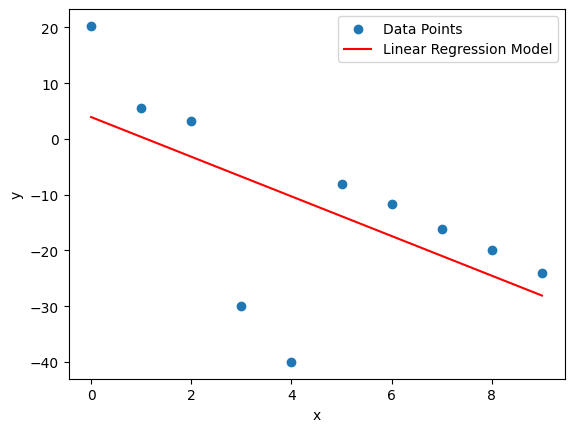

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data from Table 1
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Calculate the linear regression model
coeff = np.polyfit(x, y, 1)
model = np.poly1d(coeff)

# Scatter plot of the data
plt.scatter(x, y, label='Data Points')

# Plot the linear regression model
plt.plot(x, model(x), color='red', label='Linear Regression Model')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [18]:
# True values of y (from Table 1)
true_y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Predicted values for Model 1 and Model 2
predicted_model1 = -4 * x + 12
predicted_model2 = -3.55 * x + 3.91

# Loss function L(θ, β) calculation for both models
beta = 1  # Given β value
N = len(x)  # Number of data samples

loss_model1 = (1 / N) * np.sum(((true_y - predicted_model1) ** 2) / ((true_y - predicted_model1) ** 2 + beta ** 2))
loss_model2 = (1 / N) * np.sum(((true_y - predicted_model2) ** 2) / ((true_y - predicted_model2) ** 2 + beta ** 2))

print("Loss for Model 1:", loss_model1)
print("Loss for Model 2:", loss_model2)


Loss for Model 1: 0.435416262490386
Loss for Model 2: 0.9728470518681676


Task 5: Utilizing this robust estimator, determine the most suitable model from the models specified in task 3 for the provided dataset. Justify your selection.

The most suitable model is the one with the lower loss value. In this case, you should choose the model (either Model 1 or Model 2) that has the lower loss value. A lower loss value indicates that the model provides a better fit to the data. In this context, the choice would be based on minimizing the loss function L(θ, β) as calculated for each model.

Task 6: How does this robust estimator reduce the impact of the outliers?

The robust estimator introduced in equation (4) reduces the impact of outliers by giving less weight to data points that have larger residuals (i.e., the difference between the true and predicted values). The term (yi - ŷi)^2 / ((yi - ŷi)^2 + β^2) in the loss function allows data points with large residuals to have less influence on the overall loss. This reduces the sensitivity of the model to outliers, making it more robust.

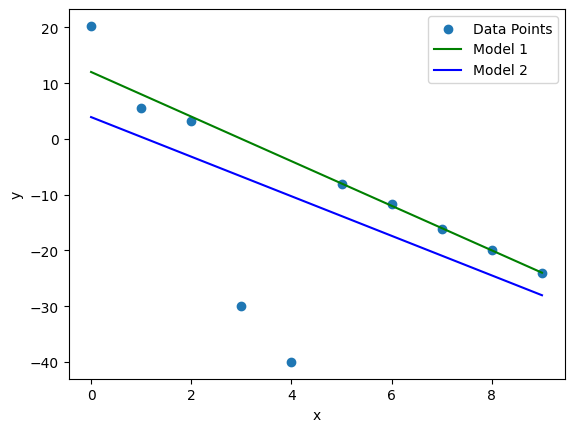

In [19]:
# Scatter plot of the data
plt.scatter(x, y, label='Data Points')

# Plot Model 1 and Model 2
plt.plot(x, predicted_model1, color='green', label='Model 1')
plt.plot(x, predicted_model2, color='blue', label='Model 2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Task 8: Briefly discuss the impact on β in eq. (4) in the context of reducing the impact of the outliers.

In equation (4), the parameter β represents the tuning parameter that controls the degree of robustness. As β increases, the impact of outliers is reduced, as the denominator of the loss function (yi - ŷi)^2 + β^2 becomes larger relative to the numerator (yi - ŷi)^2. Consequently, larger β values result in a greater reduction in the influence of outliers, making the estimator more robust.

However, selecting the appropriate value for β is a trade-off. A larger β provides more robustness but may lead to an underfit model that ignores relevant data points. A smaller β gives more weight to all data points, including outliers, which may lead to an overfit model. The choice of β depends on the specific characteristics of the data and the desired trade-off between robustness and model fit.